differential gene analysis for scrna compass data

In [5]:
library( "DESeq2" )
library('tximport')
library('stringr')
library(dplyr)
library(limma)


Attaching package: ‘limma’


The following object is masked from ‘package:DESeq2’:

    plotMA


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [2]:
out_file_path <- './'
data_dir <- paste(out_file_path,'data/compass_scrna/', sep = '')
compass_data_dir <- paste(data_dir,'github_data/linear_gene_expression_matrix.tsv', sep = '')
metadata_dir <- paste(data_dir,'github_data/cell_metadata.csv', sep = '')
out_dir <- paste(out_file_path, 'compass_comparison/scrna/', sep = '')

**read in scRNA data**

In [3]:
compass_data <- read.csv(compass_data_dir, sep = '\t', row.names = 1) # scrna
head(compass_data)

,SRR2921282,SRR2921283,SRR2921284,SRR2921285,SRR2921286,SRR2921287,SRR2921288,SRR2921289,SRR2921290,SRR2921291,⋯,SRR2921703,SRR2921704,SRR2921705,SRR2921706,SRR2921707,SRR2921708,SRR2921709,SRR2921710,SRR2921711,SRR2921712
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EIF4G3,4.202413,8.213497,4.676238,8.335730,14.91448,2.218610,16.458903,12.59756,7.669135,1.372759,⋯,11.63011,1.061471,45.966113,7.326690,0.000000,63.653552,18.824913,4.692626,50.01238,2.50319
HP1BP3,20.879206,8.599123,17.840761,7.094533,12.18247,29.230658,5.467113,19.69110,19.496050,31.359563,⋯,57.42474,3.658751,20.493097,5.972731,0.000000,7.779188,6.712236,2.797540,24.58888,61.96689
DDOST,25.655510,20.598746,32.284522,82.526757,51.56980,153.009579,49.225370,11.87836,8.742755,34.808730,⋯,33.15384,26.099879,65.711937,14.730903,39.547804,41.653284,52.311439,28.572607,27.46890,20.32548
PINK1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,2.411237,⋯,0.00000,0.000000,0.000000,0.000000,3.927381,26.141552,0.000000,0.000000,0.00000,0.00000
MUL1,5.585995,2.166604,11.534226,3.960356,0.00000,0.000000,0.000000,40.85491,6.012559,20.732405,⋯,12.43438,5.250535,0.000000,16.210612,0.000000,0.000000,1.982427,1.604774,80.45668,12.37128
TMCO4,1.796573,0.000000,0.000000,1.698039,0.00000,8.952784,1.450874,0.00000,0.000000,0.000000,⋯,0.00000,1.384000,1.222496,0.000000,0.000000,0.000000,22.991064,3.413848,0.00000,0.00000


In [4]:
metadata <- read.csv(metadata_dir, sep = ',', row.names = 1) # metadata
head(metadata)

,cell_type,MD_SRX,NREADS,NALIGNED,RALIGN
,<chr>,<chr>,<int>,<int>,<dbl>
SRR2921282,Th17p,SRX1435506,637389,396663,62.2325
SRR2921283,Th17p,SRX1435507,1074300,732092,68.1459
SRR2921284,Th17p,SRX1435508,1480810,1085800,73.3252
SRR2921285,Th17p,SRX1435509,1374340,982010,71.4531
SRR2921286,Th17p,SRX1435510,1243850,921003,74.0444
SRR2921287,Th17p,SRX1435511,1511040,1074640,71.1193


# differential expression

## 1: use limma on CPM

For the Smart-Seq libraries, due the absence of UMIs in the dataset, differentially expressed genes were called through a linear model fitted to TPM values with the limma R package and with a mean-variance trend added to the empirical Bayes prior (Ritchie et al., 2015). 

In [9]:
# most basic

In [8]:
design <- model.matrix(~ metadata$cell_type)
fit <- lmFit(compass_data, design, trend = True)
fit <- eBayes(fit)
topTable(fit)

Removing intercept from test coefficients



,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LGALS1,-1514.55654,1448.807306,-23.33180,2.008970e-68,1.770506e-64,118.29821
CAPG,-389.75821,277.378848,-18.04596,2.824997e-49,1.244835e-45,85.33895
PLP2,-527.70239,616.762659,-15.21971,8.051170e-39,2.365165e-35,66.35271
MAF,-87.91563,48.454455,-15.01013,4.758717e-38,1.048464e-34,64.92655
B4GALT1,-56.18752,42.980071,-14.31591,1.673817e-35,2.950269e-32,60.19767
CD53,194.53937,195.245153,14.04275,1.661611e-34,2.440630e-31,58.33699
FTH1,-817.82592,1376.951948,-13.79407,1.333579e-33,1.678976e-30,56.64420
CASP6,377.54257,246.110167,13.51346,1.385983e-32,1.524774e-29,54.73635
PDPN,-129.67051,70.203197,-13.49947,1.557128e-32,1.524774e-29,54.64132


log-normalized

In [18]:
log_compass = log2(compass_data+1)

In [19]:
#design <- model.matrix(~ metadata$cell_type)
log_fit <- lmFit(log_compass, design)
log_fit <- eBayes(log_fit, trend = TRUE)
topTable(log_fit)

Removing intercept from test coefficients



,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AQP3,-6.300183,3.298555,-37.14755,6.206266e-114,5.469582e-110,247.9272
MAF,-5.521903,3.369200,-33.79776,4.946358e-104,2.179613e-100,225.6459
PDPN,-5.852255,3.395294,-29.12410,3.185392e-89,9.357620e-86,192.1832
LGALS1,-1.840688,10.117213,-22.77649,3.051426e-67,6.723055e-64,142.2816
TMEM176B,-6.677593,3.523027,-22.17816,4.545083e-65,8.011164e-62,137.3370
IL9,-8.592669,4.825815,-21.82168,9.103551e-64,1.337160e-60,134.3744
TMEM176A,-6.375681,3.440489,-21.51320,1.229261e-62,1.547640e-59,131.8011
CTLA2B,-4.637422,2.530855,-20.44757,1.049770e-58,1.156453e-55,122.8484
B4GALT1,-2.329701,4.766322,-19.31889,1.672581e-54,1.637828e-51,113.2744


In [29]:
log_fit$coefficients

,(Intercept),metadata$cell_typeTh17p
EIF4G3,3.2851037,0.04574900
HP1BP3,4.6910365,-0.21643139
DDOST,4.7873558,0.16870736
PINK1,0.3297992,-0.08221812
MUL1,2.6708760,-0.50355957
TMCO4,0.7714547,0.36818727
MINOS1,7.1275232,0.19358508
CAPZB,7.9555846,-0.27296097
PQLC2,1.3933375,0.04377378
AKR7A5,0.7970208,0.20973100


In [26]:
topTable(log_fit, number = 8814)

Removing intercept from test coefficients



,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AQP3,-6.3001827,3.298555,-37.14755,6.206266e-114,5.469582e-110,247.92718
MAF,-5.5219026,3.369200,-33.79776,4.946358e-104,2.179613e-100,225.64586
PDPN,-5.8522555,3.395294,-29.12410,3.185392e-89,9.357620e-86,192.18316
LGALS1,-1.8406883,10.117213,-22.77649,3.051426e-67,6.723055e-64,142.28158
TMEM176B,-6.6775933,3.523027,-22.17816,4.545083e-65,8.011164e-62,137.33701
IL9,-8.5926688,4.825815,-21.82168,9.103551e-64,1.337160e-60,134.37440
TMEM176A,-6.3756813,3.440489,-21.51320,1.229261e-62,1.547640e-59,131.80107
CTLA2B,-4.6374218,2.530855,-20.44757,1.049770e-58,1.156453e-55,122.84843
B4GALT1,-2.3297013,4.766322,-19.31889,1.672581e-54,1.637828e-51,113.27442


In [25]:
write.fit(log_fit, file = paste(out_dir, 'de_genes_limma.csv', sep = ''))

In [27]:
write.csv(topTable(log_fit, number = 8814), paste(out_dir, 'de_genes_toptable_limma.csv', sep = ''))

Removing intercept from test coefficients



In [21]:
#write.csv(log_fit, paste(out_dir, 'de_genes_limma.csv', sep = ''))

# 2 get raw counts from FPKM

## get gene lengths

In [56]:
library(TxDb.Mmusculus.UCSC.mm9.knownGene)

In [57]:
# use mm9
exns <- exonsBy(TxDb.Mmusculus.UCSC.mm9.knownGene, by = "gene")

In [61]:
z <- width(exns)

In [62]:
z

IntegerList of length 21761
[["100009600"]] 325 94 83 354 986
[["100009609"]] 920 124 219 801 280 194
[["100009614"]] 553
[["100012"]] 883 582 314 75
[["100017"]] 1788 35 131 84 149 73 115 113 143 189
[["100019"]] 234 227 1326 225 108 193 243 132 ... 175 636 74 115 64 143 1267
[["100033459"]] 287 285 2655 107 954 68 298 988
[["100034251"]] 118 149 202
[["100034361"]] 639 90 160 161 109 538 190
[["100034684"]] 204 102 135
...
<21751 more elements>

In [63]:
zz <- sapply(z, sum)

In [64]:
head(zz)

100009600 100009609 100009614    100012    100017    100019 
     1842      2538       553      1854      2820     22899

In [66]:
#write.csv(zz, file = './data/compass_scrna/geo_data/gene_lengths_mm9.csv')

In [114]:
raw_reads <- read.csv(paste(data_dir, 'geo_data/raw_counts_from_rpkm.csv',sep = ''))
rownames(raw_reads) <- raw_reads$X
raw_reads = raw_reads[,-1]
raw_reads

,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,⋯,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZFP865,3408.243,0.000,0.000000e+00,0.0000,0.00,22147.187,0.000,0.000,0.000,0.000,⋯,0.000,0.000,0.000,7645.284,0.000000e+00,0.000,0.000,6983.060,0.000,0.0000
MED11,40057.838,226610.303,6.934584e+04,140862.7823,40225.61,9662.546,209007.846,29722.491,132380.974,40898.045,⋯,114948.319,147938.207,531685.056,5717.967,2.196656e+05,58536.016,174638.138,99196.954,348460.953,0.0000
FRMD8,0.000,36983.925,3.163703e-04,0.0000,131802.93,73368.893,102229.321,0.000,32823.508,10364.231,⋯,17435.111,59353.563,0.000,25297.149,6.484227e+04,8754.527,115891.829,3756.195,10303.610,954.8069
BTAF1,3044.077,247634.102,1.334238e+05,64392.8505,26806.67,305053.649,1506.052,138550.182,296232.246,56411.327,⋯,1530.124,288545.063,0.000,1535.897,1.545517e+04,79141.870,10298.181,0.000,0.000,4787.6223
ADAMTS13,0.000,2397.369,2.071794e+04,598.1964,12333.52,28262.604,7510.842,7136.025,20871.952,4571.122,⋯,3652.894,0.000,0.000,41183.455,1.228919e+03,15931.245,3628.956,1245.830,1865.695,2529.9849
PRPSAP1,12830.987,85385.802,2.536867e+05,41658.8173,119743.77,145364.803,110102.161,5277.771,574186.963,390888.455,⋯,240333.298,95639.025,236139.514,107214.313,1.035806e+05,261046.366,333004.297,50474.614,41996.633,137619.6704
ZC3H6,0.000,0.000,0.000000e+00,0.0000,52002.19,0.000,0.000,0.000,0.000,0.000,⋯,0.000,0.000,239154.351,0.000,0.000000e+00,0.000,0.000,0.000,74142.802,0.0000
DNA2,0.000,0.000,1.513256e+05,381193.3554,216865.37,75253.040,0.000,11814.549,49423.468,0.000,⋯,0.000,0.000,160258.879,0.000,8.490807e+03,0.000,480558.305,0.000,26071.599,4207.5087
KIN,0.000,202600.895,4.447841e+04,445154.7801,31139.84,435750.134,307518.255,287251.569,912900.547,333189.636,⋯,14685.654,0.000,1829896.755,256676.238,4.322415e+05,580043.093,1012604.917,175236.564,0.000,74344.2579


In [112]:
all_meta <- read.csv(paste(data_dir, 'geo_data/all_meta.csv',sep = ''))
rownames(all_meta) <- all_meta$'cell_id'
all_meta

,MD_SRX,cell_id,cell_type,NREADS,NALIGNED,geo
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
SRR2921289,SRX1435513,SRR2921289,Th17p,1296320,922293,GSM1943112
SRR2921321,SRX1435545,SRR2921321,Th17p,1320230,941281,GSM1943144
SRR2921373,SRX1435597,SRR2921373,Th17p,2109040,1149880,GSM1943196
SRR2921293,SRX1435517,SRR2921293,Th17p,1631870,1183900,GSM1943116
SRR2921400,SRX1435624,SRR2921400,Th17p,1895830,1292000,GSM1943223
SRR2921399,SRX1435623,SRR2921399,Th17p,2946520,2149250,GSM1943222
SRR2921344,SRX1435568,SRR2921344,Th17p,1479640,1086190,GSM1943167
SRR2921409,SRX1435633,SRR2921409,Th17p,2702100,1679700,GSM1943232
SRR2921402,SRX1435626,SRR2921402,Th17p,1907850,1280170,GSM1943225


In [113]:
sum(all_meta['cell_id'] == (colnames(raw_reads)))

[1] 290

In [87]:
head(all_meta)

,MD_SRX,cell_id,cell_type,NREADS,NALIGNED,geo
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,SRX1435513,SRR2921289,Th17p,1296320,922293,GSM1943112
2,SRX1435545,SRR2921321,Th17p,1320230,941281,GSM1943144
3,SRX1435597,SRR2921373,Th17p,2109040,1149880,GSM1943196
4,SRX1435517,SRR2921293,Th17p,1631870,1183900,GSM1943116
5,SRX1435624,SRR2921400,Th17p,1895830,1292000,GSM1943223
6,SRX1435623,SRR2921399,Th17p,2946520,2149250,GSM1943222


In [115]:
rounded_reads = round(raw_reads)
rounded_reads

,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,⋯,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZFP865,3408,0,0,0,0,22147,0,0,0,0,⋯,0,0,0,7645,0,0,0,6983,0,0
MED11,40058,226610,69346,140863,40226,9663,209008,29722,132381,40898,⋯,114948,147938,531685,5718,219666,58536,174638,99197,348461,0
FRMD8,0,36984,0,0,131803,73369,102229,0,32824,10364,⋯,17435,59354,0,25297,64842,8755,115892,3756,10304,955
BTAF1,3044,247634,133424,64393,26807,305054,1506,138550,296232,56411,⋯,1530,288545,0,1536,15455,79142,10298,0,0,4788
ADAMTS13,0,2397,20718,598,12334,28263,7511,7136,20872,4571,⋯,3653,0,0,41183,1229,15931,3629,1246,1866,2530
PRPSAP1,12831,85386,253687,41659,119744,145365,110102,5278,574187,390888,⋯,240333,95639,236140,107214,103581,261046,333004,50475,41997,137620
ZC3H6,0,0,0,0,52002,0,0,0,0,0,⋯,0,0,239154,0,0,0,0,0,74143,0
DNA2,0,0,151326,381193,216865,75253,0,11815,49423,0,⋯,0,0,160259,0,8491,0,480558,0,26072,4208
KIN,0,202601,44478,445155,31140,435750,307518,287252,912901,333190,⋯,14686,0,1829897,256676,432241,580043,1012605,175237,0,74344


In [121]:
dds <- DESeqDataSetFromMatrix(countData=rounded_reads, 
                              colData=all_meta, 
                              design=~cell_type)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [122]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2143 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [123]:
res <- results(dds)

In [124]:
res

log2 fold change (MLE): cell type Th17p vs Th17n 
Wald test p-value: cell type Th17p vs Th17n 
DataFrame with 9187 rows and 6 columns
          baseMean log2FoldChange     lfcSE       stat     pvalue      padj
         <numeric>      <numeric> <numeric>  <numeric>  <numeric> <numeric>
ZFP865     2265.35     -0.9954618  1.604878  -0.620273 0.53507839 0.9157341
MED11    134212.47     -0.0446778  0.177925  -0.251105 0.80173305 0.9744511
FRMD8     44641.66     -1.1995193  0.465422  -2.577270 0.00995841 0.0909972
BTAF1     68708.61      0.4774479  0.379883   1.256829 0.20881543 0.6664424
ADAMTS13   5844.14      0.2770867  0.314364   0.881421 0.37808998 0.8331541
...            ...            ...       ...        ...        ...       ...
CLINT1    192607.8      0.1505836 0.2964672  0.5079268  0.6115047  0.937909
FANCM      39207.0     -0.4782716 0.5457433 -0.8763673  0.3808304  0.835982
ICAM1      82611.9      0.0539246 0.5442684  0.0990772  0.9210770  0.993772
RNF145     48622.3     -0.1740

In [126]:
write.csv(res, file=paste(out_dir, 'deseq_genes_Th17p_vs_Th17n_round_from_RPKM_geo.csv', sep = ''))

# 3 get raw counts from TPM and do DE

doesn't seem to sum to 1,000,000 so unlikely to be TPM  
"We aligned single-cell SMART-Seq libraries with Bowtie2, quantified TPM gene expression with RSEM"

raw -> TPM:  
1. divide read counts by lnegth of each gene -> RPK
2. sum RPK per sample and divide by 1,000,000 -> scaling factor
3. divide RPK by scaling factor -> TPM

In [34]:
head(metadata)

,cell_type,MD_SRX,NREADS,NALIGNED,RALIGN
,<chr>,<chr>,<int>,<int>,<dbl>
SRR2921282,Th17p,SRX1435506,637389,396663,62.2325
SRR2921283,Th17p,SRX1435507,1074300,732092,68.1459
SRR2921284,Th17p,SRX1435508,1480810,1085800,73.3252
SRR2921285,Th17p,SRX1435509,1374340,982010,71.4531
SRR2921286,Th17p,SRX1435510,1243850,921003,74.0444
SRR2921287,Th17p,SRX1435511,1511040,1074640,71.1193


In [40]:
sum(, axis = 1)

[1] 272112257

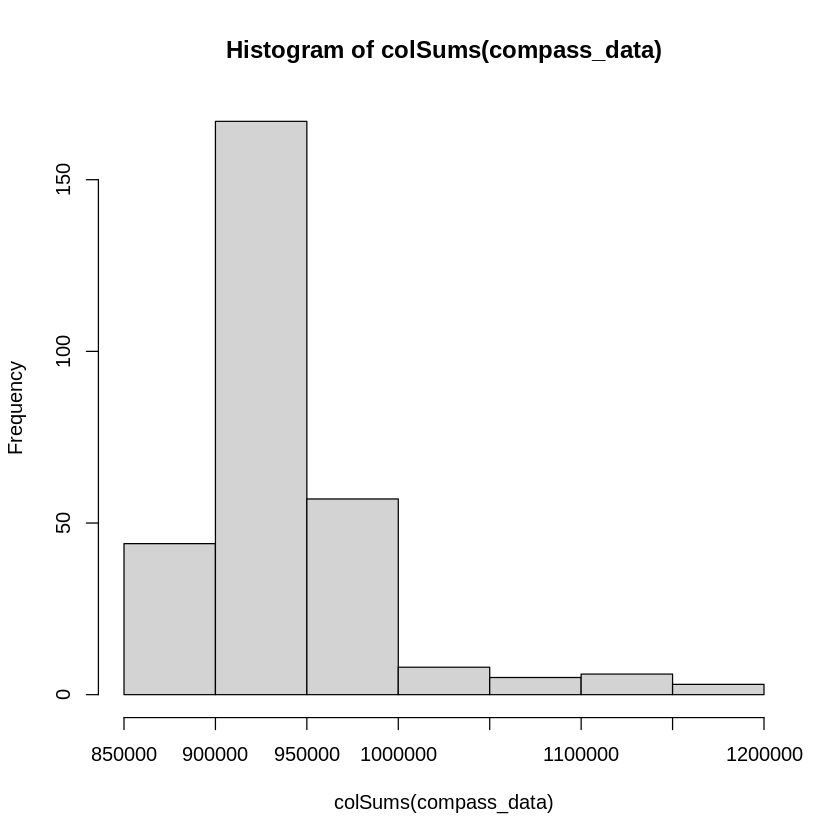

In [49]:
hist(colSums(compass_data))

In [48]:
colSums(compass_data)

SRR2921282 SRR2921283 SRR2921284 SRR2921285 SRR2921286 SRR2921287 SRR2921288 
  935740.7   891218.8   911244.5   891649.7   869951.2   894993.5   918249.7 
SRR2921289 SRR2921290 SRR2921291 SRR2921292 SRR2921293 SRR2921294 SRR2921295 
  921987.5   941167.7   914122.8   917817.1   901190.3   942054.3   926762.9 
SRR2921296 SRR2921297 SRR2921298 SRR2921299 SRR2921300 SRR2921301 SRR2921302 
  900334.7   910637.4   909613.2   917002.4   904754.3   960308.8   909151.4 
SRR2921303 SRR2921304 SRR2921305 SRR2921306 SRR2921307 SRR2921308 SRR2921309 
  941099.7   939160.8   904061.8   917902.0   940999.1   929338.9   933577.0 
SRR2921310 SRR2921311 SRR2921312 SRR2921313 SRR2921314 SRR2921315 SRR2921316 
  950904.1   937947.9   947884.4   907988.7   900152.7   923966.4   914788.7 
SRR2921317 SRR2921318 SRR2921319 SRR2921320 SRR2921321 SRR2921322 SRR2921323 
  939567.6   926947.2   900843.7   910579.6   915680.4   952680.2   918706.9 
SRR2921324 SRR2921325 SRR2921326 SRR2921327 SRR2921328 SRR2921329 SRR2921330 
  920847.8   909726.9   947777.6   919172.8   937351.4   894215.3   913001.4 
SRR2921331 SRR2921332 SRR2921333 SRR2921334 SRR2921335 SRR2921336 SRR2921337 
  935137.7   936566.0   909083.8   899337.8   919104.8   905497.7   898091.9 
SRR2921338 SRR2921339 SRR2921340 SRR2921341 SRR2921342 SRR2921343 SRR2921344 
  923509.0   909370.7   934054.4   920466.7   913784.7   952957.6   902439.9 
SRR2921345 SRR2921346 SRR2921347 SRR2921348 SRR2921349 SRR2921350 SRR2921351 
  930135.7   915419.7   905237.7   944028.4   927100.2   925046.2   902686.4 
SRR2921352 SRR2921353 SRR2921354 SRR2921355 SRR2921356 SRR2921357 SRR2921358 
  955066.6   970339.2   958674.4   976039.3   970471.0   914633.7   997627.1 
SRR2921359 SRR2921360 SRR2921361 SRR2921362 SRR2921363 SRR2921364 SRR2921365 
  968435.1   909881.5   860858.8   920339.7   974153.7   959559.8   956585.7 
SRR2921366 SRR2921367 SRR2921368 SRR2921369 SRR2921370 SRR2921371 SRR2921372 
  956326.8   927362.2   935027.1   937493.6   979754.7   981218.1   929320.2 
SRR2921373 SRR2921374 SRR2921375 SRR2921376 SRR2921377 SRR2921378 SRR2921379 
  959503.2   934809.2   982430.2   963424.8   944568.5   918769.1   975942.9 
SRR2921380 SRR2921381 SRR2921382 SRR2921383 SRR2921384 SRR2921385 SRR2921386 
  989829.3   921113.1   964364.2  1001839.1  1028740.2   968602.1   922820.2 
SRR2921387 SRR2921388 SRR2921389 SRR2921390 SRR2921391 SRR2921392 SRR2921393 
  950709.8   989534.7   985717.4   960473.7   896596.9   918746.0   958017.6 
SRR2921394 SRR2921395 SRR2921396 SRR2921397 SRR2921398 SRR2921399 SRR2921400 
  916028.6   942264.7   944166.0   966465.3   934638.3   893093.7   913945.2 
SRR2921401 SRR2921402 SRR2921403 SRR2921404 SRR2921405 SRR2921406 SRR2921407 
  985010.2   966246.4   913574.9   954635.2   981614.5   991609.9   891890.1 
SRR2921408 SRR2921409 SRR2921410 SRR2921411 SRR2921412 SRR2921413 SRR2921414 
  954867.1   972651.9   963028.5   870528.9   941819.9   950781.6   937647.2 
SRR2921415 SRR2921416 SRR2921417 SRR2921418 SRR2921419 SRR2921420 SRR2921562 
  988090.7   928796.4   979557.5   981157.8   962907.0   928563.9  1053049.4 
SRR2921563 SRR2921564 SRR2921565 SRR2921566 SRR2921567 SRR2921568 SRR2921569 
 1185690.3  1028116.7  1178042.2  1061873.0  1147290.3  1157942.0  1033211.4 
SRR2921570 SRR2921571 SRR2921572 SRR2921573 SRR2921574 SRR2921575 SRR2921576 
 1028197.2  1143320.2  1118599.1  1018351.8  1082167.1  1132643.9  1106491.8 
SRR2921577 SRR2921578 SRR2921579 SRR2921580 SRR2921581 SRR2921582 SRR2921583 
 1143499.6  1066241.0   895184.7   888892.3   916931.7   893604.9   891561.0 
SRR2921584 SRR2921585 SRR2921586 SRR2921587 SRR2921588 SRR2921589 SRR2921590 
  914372.4   908042.5   890443.1   890881.2   905167.2   909496.6   895858.2 
SRR2921591 SRR2921592 SRR2921593 SRR2921594 SRR2921595 SRR2921596 SRR2921597 
  911193.9   919240.4   889694.1   902093.3   892303.4   914086.9   902488.9 
SRR2921598 SRR2921599 SRR2921600 SRR2921601 SRR2921602 SRR2921603 SRR2921604 
  902847.0   902576.6 

In [44]:
rowSums(compass_data)

EIF4G3         HP1BP3          DDOST          PINK1           MUL1 
     4513.4340     10640.0351     10933.2573       330.7910      3415.5961 
         TMCO4         MINOS1          CAPZB          PQLC2         AKR7A5 
      885.5568     45161.8613     72062.6466      2348.0405       971.1570 
         MRTO4          SP110           EMC1           UBR4        ALDH4A1 
    64257.4612     36981.7021      4706.0733      3244.6695       688.2697 
         SP140           RCC2          PADI2           SDHB        ATP13A2 
    22118.1060      6530.9811      1392.5282    239163.0150       322.6547 
         SP100         NECAP2          SZRD1         FBXO42           RSG1 
    21364.0615     11183.9783      2901.7614       982.4992       483.1404 
 A630001G21RIK         ZBTB17           DDI2         RSC1A1        DNAJC16 
     2355.6008      1826.0120       467.6743      3662.4237       493.7895 
         CASP9          EFHD2          CAB39          ITM2C          PRDM2 
      755.2901      1241.3843     14825.4490      1397.1969      1673.6647 
          PDPN        PRAMEF8          DHRS3       TNFRSF1B        TNFRSF8 
    20358.9271      2574.6498      2699.8358      3382.3899      2517.4935 
       GM13212          PSMD1        GM13051          ARMC9        GM13139 
     1727.7203     43494.7467       447.5228       473.6403      2664.6332 
       GM13157            NCL           MIIP           MFN2          PLOD1 
     8890.5369    110009.9269     12269.9882      1648.1812       491.6315 
 2510039O18RIK          MTHFR         AGTRAP         MAD2L2          FBXO6 
     1233.9035       694.9474      1063.0425     74446.4175      6327.9324 
        FBXO44         UBIAD1           MTOR        EXOSC10            SRM 
     1062.0144      1730.1356      1514.4750     14556.3685     14769.4489 
        TARDBP          PEX14           DFFA         APITD1            PGD 
    20055.1675      1008.4034      3712.2765     17057.2312     11783.5627 
         KIF1B          UBE4B         NMNAT1           LZIC       CTNNBIP1 
     1452.9606      1827.5948      3688.6129     26288.4349       313.4816 
        PIK3CD        TMEM201       SLC25A33          SPSB1           H6PD 
     1885.9651       559.3292       491.0129      1183.7835       360.0114 
          ENO1         ERRFI1          PARK7        TNFRSF9           PER3 
  1596075.5323       529.4816    178509.0638      9227.8175       451.1999 
         VAMP3        DNAJC11          THAP3          PHF13         KLHL21 
    19498.5034     11557.0294      1987.7926       542.5916       574.2406 
        ZBTB48           NOL9           PTMA       TNFRSF25           ESPN 
     1090.4377      5476.7698    812522.0353     17728.1715      1485.6944 
         ACOT7          PDE6D          RPL22         KCNAB2         COPS7B 
   104698.8950      4461.4954     46150.3266      2050.3459      7352.7184 
 A430005L14RIK           DFFB         CEP104         LRRC47          SMIM1 
    25323.0802      1953.6794       929.9846      1088.4844       457.4653 
        DIS3L2         WRAP73          TPRGL        FAM213B       TNFRSF14 
     1379.3588      8236.2072      2183.9653      3078.4481       297.2517 
         PANK4          PEX10           RER1            SKI  2610002J02RIK 
     3571.0518       374.5415     31439.2776      4015.4475     25169.1916 
         PRKCZ           GNB1           NADK        SLC35E2         CDK11B 
      423.2378     58711.6050      7996.2476      2715.5952     13553.0614 
         SSU72         ATAD3A           VWA1        TMEM88B         MRPL20 
    73340.7190      3890.0953       191.5337      1759.3719    236716.2070 
         CCNL2       AURKAIP1         CPSF3L          PUSL1         UBE2J2 
     6239.8627     50063.4583     11858.4057      5158.5354      1509.5418 
       FAM132A           SDF4        TNFRSF4       TNFRSF18  9430015G10RIK 
      643.1336     25328.1949    464485.2045    178378.4543      3978.4393 
         ISG15          NOC2L           CDK6        FAM1

for now, round ints

In [22]:
# for now, round ints
#compass_data <- round(compass_data_raw)

In [23]:
head(compass_data)

,Th17p_Vehicle_WT1_run1,Th17p_Vehicle_WT1_run2,Th17n_Vehicle_WT1_run1,Th17n_Vehicle_WT1_run2,iTreg_Vehicle_WT1_run1,iTreg_Vehicle_WT1_run2,Th17p_DFMO_WT1_run1,Th17p_DFMO_WT1_run2,Th17n_DFMO_WT1_run1,Th17n_DFMO_WT1_run2,⋯,Th17n_Vehicle_WT3_run1,Th17n_Vehicle_WT3_run2,iTreg_Vehicle_WT3_run1,iTreg_Vehicle_WT3_run2,Th17p_DFMO_WT3_run1,Th17p_DFMO_WT3_run2,Th17n_DFMO_WT3_run1,Th17n_DFMO_WT3_run2,iTreg_DFMO_WT3_run1,iTreg_DFMO_WT3_run2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14RIK,787,870,708,845,570,624,786,846,864,978,⋯,1183,1332,794,853,928,1045,1120,1163,710,723
0610009B22RIK,93,98,66,70,88,100,123,128,106,104,⋯,94,76,109,145,121,131,131,138,137,148
0610009L18RIK,2,2,2,1,3,4,4,5,3,2,⋯,6,3,0,0,5,11,3,4,4,5
0610009O20RIK,177,206,148,170,194,159,168,172,161,158,⋯,249,284,202,255,216,229,212,226,259,246
0610010F05RIK,24,23,23,25,41,43,32,22,32,31,⋯,46,39,30,40,44,55,24,31,20,14
0610010K14RIK,182,254,211,256,193,239,231,254,264,313,⋯,243,288,297,310,317,294,283,332,416,453


In [33]:
meta_data$sample

[1] "Th17p_Vehicle_WT1" "Th17p_Vehicle_WT1" "Th17n_Vehicle_WT1"
 [4] "Th17n_Vehicle_WT1" "iTreg_Vehicle_WT1" "iTreg_Vehicle_WT1"
 [7] "Th17p_DFMO_WT1"    "Th17p_DFMO_WT1"    "Th17n_DFMO_WT1"   
[10] "Th17n_DFMO_WT1"    "iTreg_DFMO_WT1"    "iTreg_DFMO_WT1"   
[13] "Th17p_Vehicle_WT2" "Th17p_Vehicle_WT2" "Th17n_Vehicle_WT2"
[16] "Th17n_Vehicle_WT2" "iTreg_Vehicle_WT2" "iTreg_Vehicle_WT2"
[19] "Th17p_DFMO_WT2"    "Th17p_DFMO_WT2"    "Th17n_DFMO_WT2"   
[22] "Th17n_DFMO_WT2"    "iTreg_DFMO_WT2"    "iTreg_DFMO_WT2"   
[25] "Th17p_Vehicle_WT3" "Th17p_Vehicle_WT3" "Th17n_Vehicle_WT3"
[28] "Th17n_Vehicle_WT3" "iTreg_Vehicle_WT3" "iTreg_Vehicle_WT3"
[31] "Th17p_DFMO_WT3"    "Th17p_DFMO_WT3"    "Th17n_DFMO_WT3"   
[34] "Th17n_DFMO_WT3"    "iTreg_DFMO_WT3"    "iTreg_DFMO_WT3"

[1] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
 [5] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
 [9] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"   
[13] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
[17] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
[21] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"   
[25] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
[29] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
[33] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"

In [41]:
meta_data <- data.frame(colnames(compass_data))
rownames(meta_data) <- colnames(compass_data)
colnames(meta_data) <- c('sample')
meta_data$rep <- c('WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3')
meta_data$sample <- str_replace(meta_data$sample, '_run1', '')
meta_data$sample <- str_replace(meta_data$sample, '_run2', '')
meta_data$sample <- substr(meta_data$sample,1,nchar(meta_data$sample)-4)
meta_data

,sample,rep
,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1
iTreg_Vehicle_WT1_run1,iTreg_Vehicle,WT1
iTreg_Vehicle_WT1_run2,iTreg_Vehicle,WT1
Th17p_DFMO_WT1_run1,Th17p_DFMO,WT1
Th17p_DFMO_WT1_run2,Th17p_DFMO,WT1
Th17n_DFMO_WT1_run1,Th17n_DFMO,WT1


[1] "Th17p_Vehicle" "Th17n_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"   
[5] "Th17n_DFMO"    "iTreg_DFMO"

In [86]:
# 1 vs all for each
dds_results <- vector("list", length = length(meta_data['sample']$sample))
names(dds_results) <- unique(meta_data['sample'])$sample
i=0
for (samp in unique(meta_data['sample'])$sample){
    meta_data_2 <- meta_data
    meta_data_2$test <- meta_data_2$sample
    meta_data_2$test[meta_data$sample!=samp] <- 'other'
    meta_data_2$test <- str_replace(meta_data_2$test, samp, 'group')
    
    dds <- DESeqDataSetFromMatrix(countData=compass_data, 
                              colData=meta_data_2, 
                              design=~rep + test)
    dds <- DESeq(dds)
    res <- results(dds)
    dds_results[i] <- res
    i = i+1
}

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 26 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

Warning message in `[<-`(`*tmp*`, i, value = res):
“implicit list embedding of S4 objects is deprecated”
converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outl

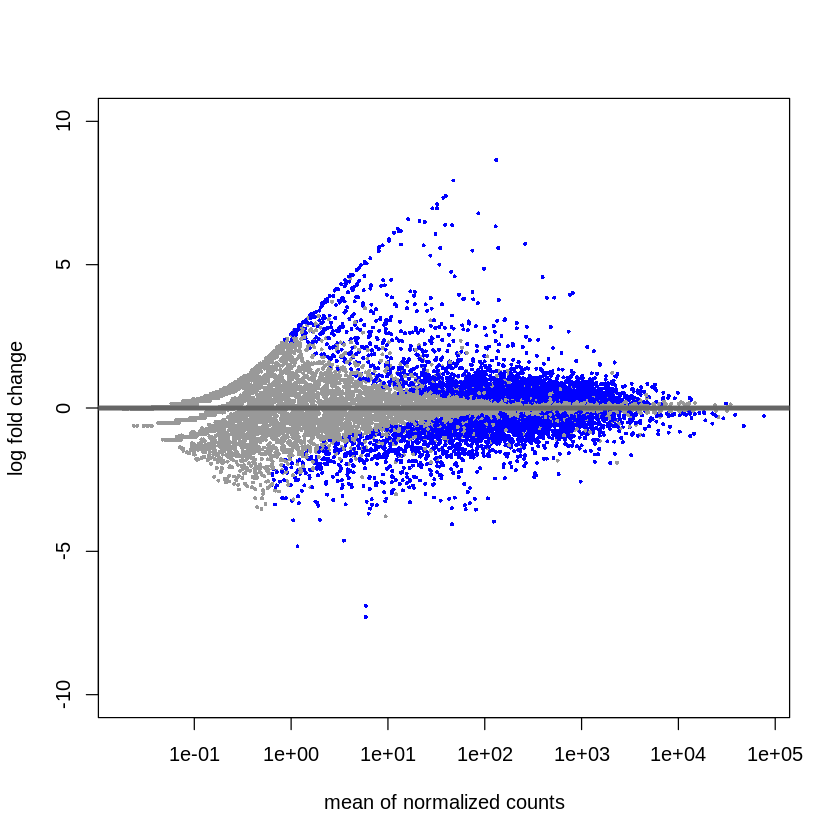

In [103]:
plotMA(dds_results$Th17p_Vehicle, ylim = c(-10, 10) )

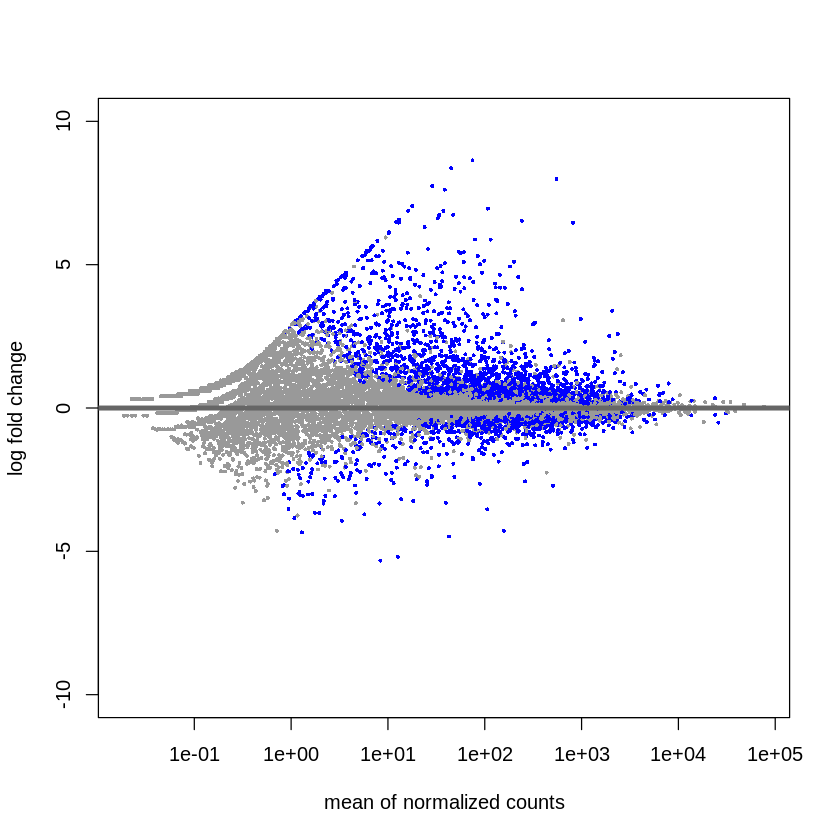

In [116]:
plotMA(dds_results$iTreg_Vehicle, ylim = c(-10, 10) )

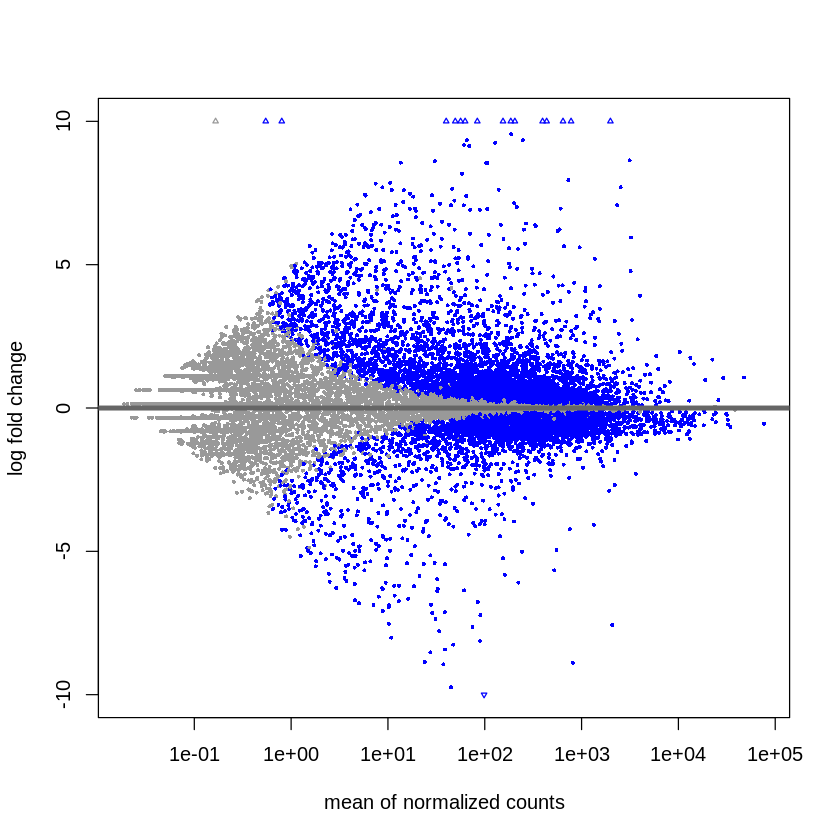

In [102]:
plotMA(res_all, ylim = c(-10, 10) )

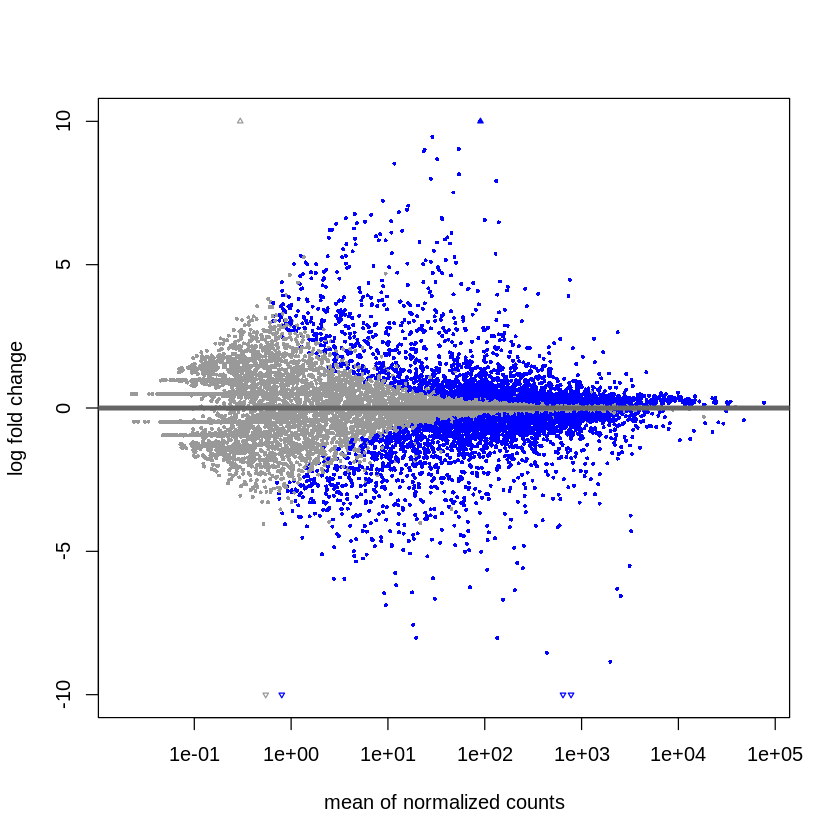

In [117]:
plotMA(r, ylim = c(-10, 10) )

In [118]:
meta_data

,sample,rep
,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1
iTreg_Vehicle_WT1_run1,iTreg_Vehicle,WT1
iTreg_Vehicle_WT1_run2,iTreg_Vehicle,WT1
Th17p_DFMO_WT1_run1,Th17p_DFMO,WT1
Th17p_DFMO_WT1_run2,Th17p_DFMO,WT1
Th17n_DFMO_WT1_run1,Th17n_DFMO,WT1


In [98]:
dds_all <- DESeqDataSetFromMatrix(countData=compass_data, 
                              colData=meta_data, 
                              design=~rep + sample)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [99]:
dds_all <- DESeq(dds_all)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [100]:
res_all <- results(dds_all)
res_all

log2 fold change (MLE): sample Th17p Vehicle vs iTreg DFMO 
Wald test p-value: sample Th17p Vehicle vs iTreg DFMO 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 877.90366       0.575453 0.0594915  9.672861 3.93228e-22
0610009B22RIK 108.51100      -0.276666 0.1130797 -2.446646 1.44192e-02
0610009L18RIK   3.27191      -0.123192 0.7142485 -0.172477 8.63062e-01
0610009O20RIK 203.81685      -0.111106 0.0978583 -1.135371 2.56220e-01
0610010F05RIK  28.81435       0.650939 0.2440219  2.667545 7.64078e-03
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          270.947      0.4814023 0.0902064  5.336678 9.46647e-08
ZYX             370.487      0.4724812 0.1024606  4.611343 4.00076e-06
ZZEF1           234.860     -0.0445362 0.0978150 -0.455311 6.488

In [114]:
for (r1 in unique(meta_data['sample'])$sample){
    for (r2 in unique(meta_data['sample'])$sample){
        if (r1 != r2){
            r <- results(dds_all, contrast=c("sample",r1,r2))
            fname <- paste(data_dir, 'deseq_genes_', r1, '_', r2, '.csv', sep = '')
            write.csv(r, file=fname)
        }
    }
}

# run only Thn vs Thp

In [126]:
compass_th <- compass_data %>% select(contains('Th17'))
compass_th <- compass_th %>% select(contains('Vehicle'))

In [127]:
compass_th

,Th17p_Vehicle_WT1_run1,Th17p_Vehicle_WT1_run2,Th17n_Vehicle_WT1_run1,Th17n_Vehicle_WT1_run2,Th17p_Vehicle_WT2_run1,Th17p_Vehicle_WT2_run2,Th17n_Vehicle_WT2_run1,Th17n_Vehicle_WT2_run2,Th17p_Vehicle_WT3_run1,Th17p_Vehicle_WT3_run2,Th17n_Vehicle_WT3_run1,Th17n_Vehicle_WT3_run2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14RIK,787,870,708,845,879,956,974,1064,905,1022,1183,1332
0610009B22RIK,93,98,66,70,103,77,88,83,93,97,94,76
0610009L18RIK,2,2,2,1,2,4,6,9,2,2,6,3
0610009O20RIK,177,206,148,170,149,162,187,216,204,250,249,284
0610010F05RIK,24,23,23,25,18,20,19,13,28,39,46,39
0610010K14RIK,182,254,211,256,171,176,228,267,206,220,243,288
0610011F06RIK,283,314,305,338,234,291,340,298,353,372,393,477
0610030E20RIK,212,210,164,195,176,206,182,246,227,247,261,258
0610037L13RIK,105,113,106,113,99,113,132,106,132,160,130,147


In [155]:
meta_data_th <- data.frame(colnames(compass_th))
rownames(meta_data_th) <- colnames(compass_th)
colnames(meta_data_th) <- c('sample')
meta_data_th$rep <- c(rep('WT1', 4),rep('WT2', 4),rep('WT3', 4))
meta_data_th$collapse <- meta_data_th$sample
meta_data_th$collapse <- str_replace(meta_data_th$collapse, '_run1', '')
meta_data_th$collapse <- str_replace(meta_data_th$collapse, '_run2', '')
meta_data_th$sample <- str_replace(meta_data_th$sample, '_run1', '')
meta_data_th$sample <- str_replace(meta_data_th$sample, '_run2', '')
meta_data_th$sample <- substr(meta_data_th$sample,1,nchar(meta_data_th$sample)-4)
meta_data_th

,sample,rep,collapse
,<chr>,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1,Th17p_Vehicle_WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1,Th17p_Vehicle_WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1,Th17n_Vehicle_WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1,Th17n_Vehicle_WT1
Th17p_Vehicle_WT2_run1,Th17p_Vehicle,WT2,Th17p_Vehicle_WT2
Th17p_Vehicle_WT2_run2,Th17p_Vehicle,WT2,Th17p_Vehicle_WT2
Th17n_Vehicle_WT2_run1,Th17n_Vehicle,WT2,Th17n_Vehicle_WT2
Th17n_Vehicle_WT2_run2,Th17n_Vehicle,WT2,Th17n_Vehicle_WT2
Th17p_Vehicle_WT3_run1,Th17p_Vehicle,WT3,Th17p_Vehicle_WT3


In [141]:
## first without collapsing technical replicates

In [197]:
meta_data

,sample,rep
,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1
iTreg_Vehicle_WT1_run1,iTreg_Vehicle,WT1
iTreg_Vehicle_WT1_run2,iTreg_Vehicle,WT1
Th17p_DFMO_WT1_run1,Th17p_DFMO,WT1
Th17p_DFMO_WT1_run2,Th17p_DFMO,WT1
Th17n_DFMO_WT1_run1,Th17n_DFMO,WT1


In [159]:
dds_th <- DESeqDataSetFromMatrix(countData=compass_th, 
                              colData=meta_data_th, 
                              design=~rep + sample)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [160]:
dds_th_1 <- DESeq(dds_th)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [144]:
res_th_1 <- results(dds_th_1)
res_th_1

log2 fold change (MLE): sample Th17p Vehicle vs Th17n Vehicle 
Wald test p-value: sample Th17p Vehicle vs Th17n Vehicle 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 944.09953     -0.1457658 0.0508805 -2.864867  0.00417185
0610009B22RIK  86.18692      0.2449138 0.1423735  1.720221  0.08539226
0610009L18RIK   3.37101     -0.8144729 0.6862180 -1.186901  0.23526661
0610009O20RIK 195.33555     -0.1106081 0.0934281 -1.183884  0.23645894
0610010F05RIK  25.53742     -0.0755394 0.2471687 -0.305619  0.75989483
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          288.482      0.0809733 0.0900978  0.898727 3.68798e-01
ZYX             398.640     -0.4558469 0.0700428 -6.508119 7.60977e-11
ZZEF1           212.350      0.1518693 0.1070475  1.418710

In [173]:
write.csv(res_th_1, file='./data/th_data/deseq_genes_th_uncollapse.csv')

In [ ]:
# collapse technical replicates

In [156]:
meta_data_th

,sample,rep,collapse
,<chr>,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1,Th17p_Vehicle_WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1,Th17p_Vehicle_WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1,Th17n_Vehicle_WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1,Th17n_Vehicle_WT1
Th17p_Vehicle_WT2_run1,Th17p_Vehicle,WT2,Th17p_Vehicle_WT2
Th17p_Vehicle_WT2_run2,Th17p_Vehicle,WT2,Th17p_Vehicle_WT2
Th17n_Vehicle_WT2_run1,Th17n_Vehicle,WT2,Th17n_Vehicle_WT2
Th17n_Vehicle_WT2_run2,Th17n_Vehicle,WT2,Th17n_Vehicle_WT2
Th17p_Vehicle_WT3_run1,Th17p_Vehicle,WT3,Th17p_Vehicle_WT3


In [162]:
dds_th_2 <- collapseReplicates(dds_th, groupby = dds_th$collapse)

In [166]:
colData(dds_th_2)

DataFrame with 6 rows and 3 columns
                         sample      rep          collapse
                       <factor> <factor>       <character>
Th17n_Vehicle_WT1 Th17n_Vehicle      WT1 Th17n_Vehicle_WT1
Th17n_Vehicle_WT2 Th17n_Vehicle      WT2 Th17n_Vehicle_WT2
Th17n_Vehicle_WT3 Th17n_Vehicle      WT3 Th17n_Vehicle_WT3
Th17p_Vehicle_WT1 Th17p_Vehicle      WT1 Th17p_Vehicle_WT1
Th17p_Vehicle_WT2 Th17p_Vehicle      WT2 Th17p_Vehicle_WT2
Th17p_Vehicle_WT3 Th17p_Vehicle      WT3 Th17p_Vehicle_WT3

In [168]:
dds_th_2 <- DESeq(dds_th_2)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [169]:
res_th_2 <- results(dds_th_2)
res_th_2

log2 fold change (MLE): sample Th17p Vehicle vs Th17n Vehicle 
Wald test p-value: sample Th17p Vehicle vs Th17n Vehicle 
DataFrame with 20817 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 1893.14275     -0.1467180 0.0954779 -1.536671    0.124374
0610009B22RIK  172.13627      0.2426256 0.2478792  0.978806    0.327676
0610009L18RIK    6.75663     -0.7362570 1.2135075 -0.606718    0.544038
0610009O20RIK  391.97999     -0.1114945 0.1754324 -0.635541    0.525075
0610010F05RIK   51.10194     -0.0508497 0.4532624 -0.112186    0.910676
...                  ...            ...       ...       ...         ...
ZYG11A             0.000             NA        NA        NA          NA
ZYG11B           578.149      0.0821206  0.154632  0.531070 0.595370107
ZYX              799.606     -0.4582485  0.125636 -3.647429 0.000264877
ZZEF1            425.750      0.1473538  0.1783

In [174]:
write.csv(res_th_2, file='./data/th_data/deseq_genes_th_collapse.csv')

In [170]:
resultsNames(dds_th_1)

[1] "Intercept"                            
[2] "rep_WT2_vs_WT1"                       
[3] "rep_WT3_vs_WT1"                       
[4] "sample_Th17p_Vehicle_vs_Th17n_Vehicle"

In [171]:
resultsNames(dds_th_2)

[1] "Intercept"                            
[2] "rep_WT2_vs_WT1"                       
[3] "rep_WT3_vs_WT1"                       
[4] "sample_Th17p_Vehicle_vs_Th17n_Vehicle"

# explore differences

In [182]:
dds_all <- DESeqDataSetFromMatrix(countData=compass_data, 
                              colData=meta_data, 
                              design=~rep + sample)
dds_all <- DESeq(dds_all)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [183]:
dds_th <- DESeqDataSetFromMatrix(countData=compass_th, 
                              colData=meta_data_th, 
                              design=~rep + sample)
dds_th <- DESeq(dds_th)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [188]:
results(dds_all, contrast=c("sample",'Th17p_Vehicle','Th17n_Vehicle'))

log2 fold change (MLE): sample Th17p_Vehicle vs Th17n_Vehicle 
Wald test p-value: sample Th17p_Vehicle vs Th17n_Vehicle 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 877.90366     -0.1382053 0.0580017 -2.382782   0.0171824
0610009B22RIK 108.51100      0.2483511 0.1198900  2.071492   0.0383129
0610009L18RIK   3.27191     -0.9473706 0.6806631 -1.391835   0.1639724
0610009O20RIK 203.81685     -0.0995964 0.0986359 -1.009738   0.3126209
0610010F05RIK  28.81435     -0.0881894 0.2295932 -0.384111   0.7008958
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          270.947      0.0931601 0.0888465   1.04855 2.94385e-01
ZYX             370.487     -0.4502753 0.0997027  -4.51618 6.29660e-06
ZZEF1           234.860      0.1567380 0.0995688   1.57417

In [195]:
results(dds_th, contrast=c("sample",'Th17p_Vehicle','Th17n_Vehicle'))

log2 fold change (MLE): sample Th17p_Vehicle vs Th17n_Vehicle 
Wald test p-value: sample Th17p Vehicle vs Th17n Vehicle 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 944.09953     -0.1457658 0.0508805 -2.864867  0.00417185
0610009B22RIK  86.18692      0.2449138 0.1423735  1.720221  0.08539226
0610009L18RIK   3.37101     -0.8144729 0.6862180 -1.186901  0.23526661
0610009O20RIK 195.33555     -0.1106081 0.0934281 -1.183884  0.23645894
0610010F05RIK  25.53742     -0.0755394 0.2471687 -0.305619  0.75989483
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          288.482      0.0809733 0.0900978  0.898727 3.68798e-01
ZYX             398.640     -0.4558469 0.0700428 -6.508119 7.60977e-11
ZZEF1           212.350      0.1518693 0.1070475  1.418710

In [196]:
results(dds_th, contrast=c("sample",'Th17n_Vehicle','Th17p_Vehicle'))

log2 fold change (MLE): sample Th17n_Vehicle vs Th17p_Vehicle 
Wald test p-value: sample Th17n_Vehicle vs Th17p_Vehicle 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 944.09953      0.1457658 0.0508805  2.864867  0.00417185
0610009B22RIK  86.18692     -0.2449138 0.1423735 -1.720221  0.08539226
0610009L18RIK   3.37101      0.8144729 0.6862180  1.186901  0.23526661
0610009O20RIK 195.33555      0.1106081 0.0934281  1.183884  0.23645894
0610010F05RIK  25.53742      0.0755394 0.2471687  0.305619  0.75989483
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          288.482     -0.0809733 0.0900978 -0.898727 3.68798e-01
ZYX             398.640      0.4558469 0.0700428  6.508119 7.60977e-11
ZZEF1           212.350     -0.1518693 0.1070475 -1.418710